In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import nibabel as nib
from skimage.transform import resize

def nifti_to_resized_nifti(nifti_file_path, resized_nifti_file_path, ref_size):
  mask = nib.load(nifti_file_path)
  mask_data = mask.get_fdata()
  output = resize(mask_data, ref_size, order=1, mode='reflect') # order=1 (Bi-linear) is the default value and it seems that with 3D image, Bi-linear is equivalent to 'trilinear' of SPM's imcalc function ?
  output_ref_mask = nib.Nifti1Image(output, mask.affine, mask.header) # Here some test was done by using also output_ref_ref = nib.Nifti1Image(output, ref.affine, ref.header) etc.
  nib.save(output_ref_mask, resized_nifti_file_path)

In [6]:
import os
import matplotlib.pyplot as plt

nifti_file_dir = '/content/drive/MyDrive/IBMB/nifti'

resized_nifti_file_dir = '/content/drive/MyDrive/IBMB/nifti_32x32'
ref_size = (32, 32, 18)

for nifti_file in os.listdir(nifti_file_dir):
  nifti_file_path = nifti_file_dir + '/' + nifti_file
  resized_nifti_file_path = resized_nifti_file_dir + '/' + nifti_file
  nifti_to_resized_nifti(nifti_file_path, resized_nifti_file_path, ref_size)

sorce shape:
(212, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(196, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(200, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(216, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(200, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(196, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(196, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(196, 256, 18)
resized shape:
(32, 32, 18)
sorce shape:
(188, 256, 18)
resized shape:
(32, 

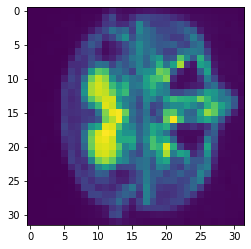

In [7]:
for nifti_file in os.listdir(nifti_file_dir):
  nifti_file_path = nifti_file_dir + '/' + nifti_file
  resized_nifti_file_path = resized_nifti_file_dir + '/' + nifti_file

  source_file = nib.load(nifti_file_path)
  resized_file = nib.load(resized_nifti_file_path)

  source_data = source_file.get_fdata()
  resized_data = resized_file.get_fdata()
  
  print('sorce shape:')
  print(source_data.shape)

  print('resized shape:')
  print(resized_data.shape)

  plt.imshow(resized_data[:,:,2])


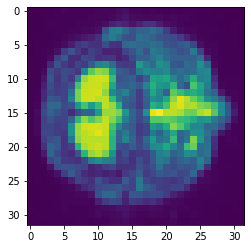

In [8]:
test_file = nib.load('/content/drive/MyDrive/IBMB/nifti_32x32/980500351101.nii.gz')
test_data = test_file.get_fdata()
plt.imshow(test_data[:,:,2])